In [24]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


In [25]:
from google.colab import files
uploaded = files.upload()

Saving rectangle.jpeg to rectangle (1).jpeg


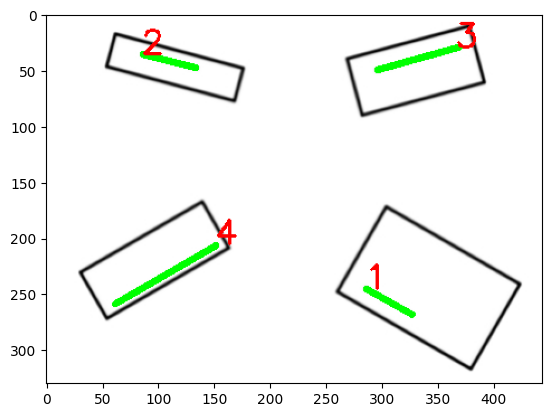

In [26]:
# Load the image, ensuring the path is correct or the file is uploaded
image = cv2.imread('rectangle.jpeg')

# Check if the image loaded successfully
if image is None:
    print("Error: Could not load image. Check the file path or upload the image.")
else:
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    edges = cv2.Canny(gray, 50, 150)

# Find contours in the edge-detected image with hierarchical retrieval
contours, hierarchy = cv2.findContours(edges, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)

# Create a copy of the original image to draw the contours on
contour_image = image.copy()
# Lists to store the lengths of inner contours (lines)
inner_contour_lengths = []

# Loop through the contours and hierarchy
for i, contour in enumerate(contours):
    # Get the parent index from the hierarchy
    parent_idx = hierarchy[0][i][3]


    if parent_idx != -1:
        # Inner contour, line
        perimeter = cv2.arcLength(contour, True)
        inner_contour_lengths.append((perimeter, i))  # Store length and index


# Sort the inner contour lengths in ascending order
inner_contour_lengths.sort()

# Assign numbers to the lines based on their lengths
line_numbers = {length_index[1]: i + 1 for i, length_index in enumerate(inner_contour_lengths)}

# Draw and label the lines for the four contours with lowest lengths
for length, index in inner_contour_lengths[:4]:  # Only the first four contours
    contour = contours[index]
    cv2.drawContours(contour_image, [contour], -1, (0, 255, 0), 2)  # Green color
    number = line_numbers[index]
    cv2.putText(contour_image, str(number), tuple(contour[0][0]), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)  # Red color

plt.imshow(cv2.cvtColor(contour_image, cv2.COLOR_BGR2RGB))
plt.show()